In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# # Google Colab 사용 시 아래 주석을 풀고 폰트설정을 합니다.
# # 로컬 아나콘다 사용 시에는 그대로 주석처리 해놓으시면 됩니다.
# # 나눔고딕 설치
# # 이 코드를 사용시 아래에 있는 폰트를 로드할 경우 colab에서는 오류가 발생하니
# # 아래에 있는 폰트 설정은 꼭 주석처리를 해주세요. 
# #!apt -qq -y install fonts-nanum > /dev/null

# import matplotlib.font_manager as fm

# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=9)
# fm._rebuild()


# # Colab 의 한글 폰트 설정
# plt.rc('font', family='NanumGothic') 
# # 마이너스 폰트 깨지는 문제에 대한 대처
# plt.rc("axes", unicode_minus=False)

In [3]:
plt.rc("font", family='Malgun Gothic')
plt.rc("axes", unicode_minus=False)

In [4]:
%config InlineBackend.figure_format = 'retina'

In [5]:
df = pd.read_csv("data/NHIS_OPEN_GJ_2017.csv", encoding="cp949")
df.shape

(1000000, 34)

In [6]:
df.head()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  시력(좌)  \
0  2017        1     1            8    43        170         75  90.0    1.0   
1  2017        2     1            7    11        180         80  89.0    0.9   
2  2017        3     1            9    41        165         75  91.0    1.2   
3  2017        4     1           11    48        175         80  91.0    1.5   
4  2017        5     1           11    30        165         60  80.0    1.0   

   시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  치아마모증유무  \
0    1.0  ...   40.0   1.0   1.0         1      NaN    NaN      NaN   
1    1.2  ...   27.0   3.0   0.0         1      NaN    NaN      NaN   
2    1.5  ...   68.0   1.0   0.0         0      NaN    NaN      NaN   
3    1.2  ...   18.0   1.0   0.0         1      NaN    NaN      NaN   
4    1.2  ...   25.0   1.0   0.0         1      NaN    NaN      NaN   

   제3대구치(사랑니)이상   치석   데이터공개일자  
0           NaN  1.0  20181126  
1           NaN  2.0  20181126  
2           NaN  NaN  20181126  
3           NaN  0.0  20181126  
4           NaN  0.0  20181126  

[5 rows x 34 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg단위)     1000000 non-null  int64  
 7   허리둘레          999734 non-null   float64
 8   시력(좌)         999817 non-null   float64
 9   시력(우)         999811 non-null   float64
 10  청력(좌)         999842 non-null   float64
 11  청력(우)         999844 non-null   float64
 12  수축기혈압         999981 non-null   float64
 13  이완기혈압         999982 non-null   float64
 14  식전혈당(공복혈당)    999958 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999955 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [8]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [9]:
df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)         int64
체중(5Kg단위)         int64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부            float64
구강검진수검여부          int64
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석              float64
데이터공개일자           int64
dtype: object

<AxesSubplot:>

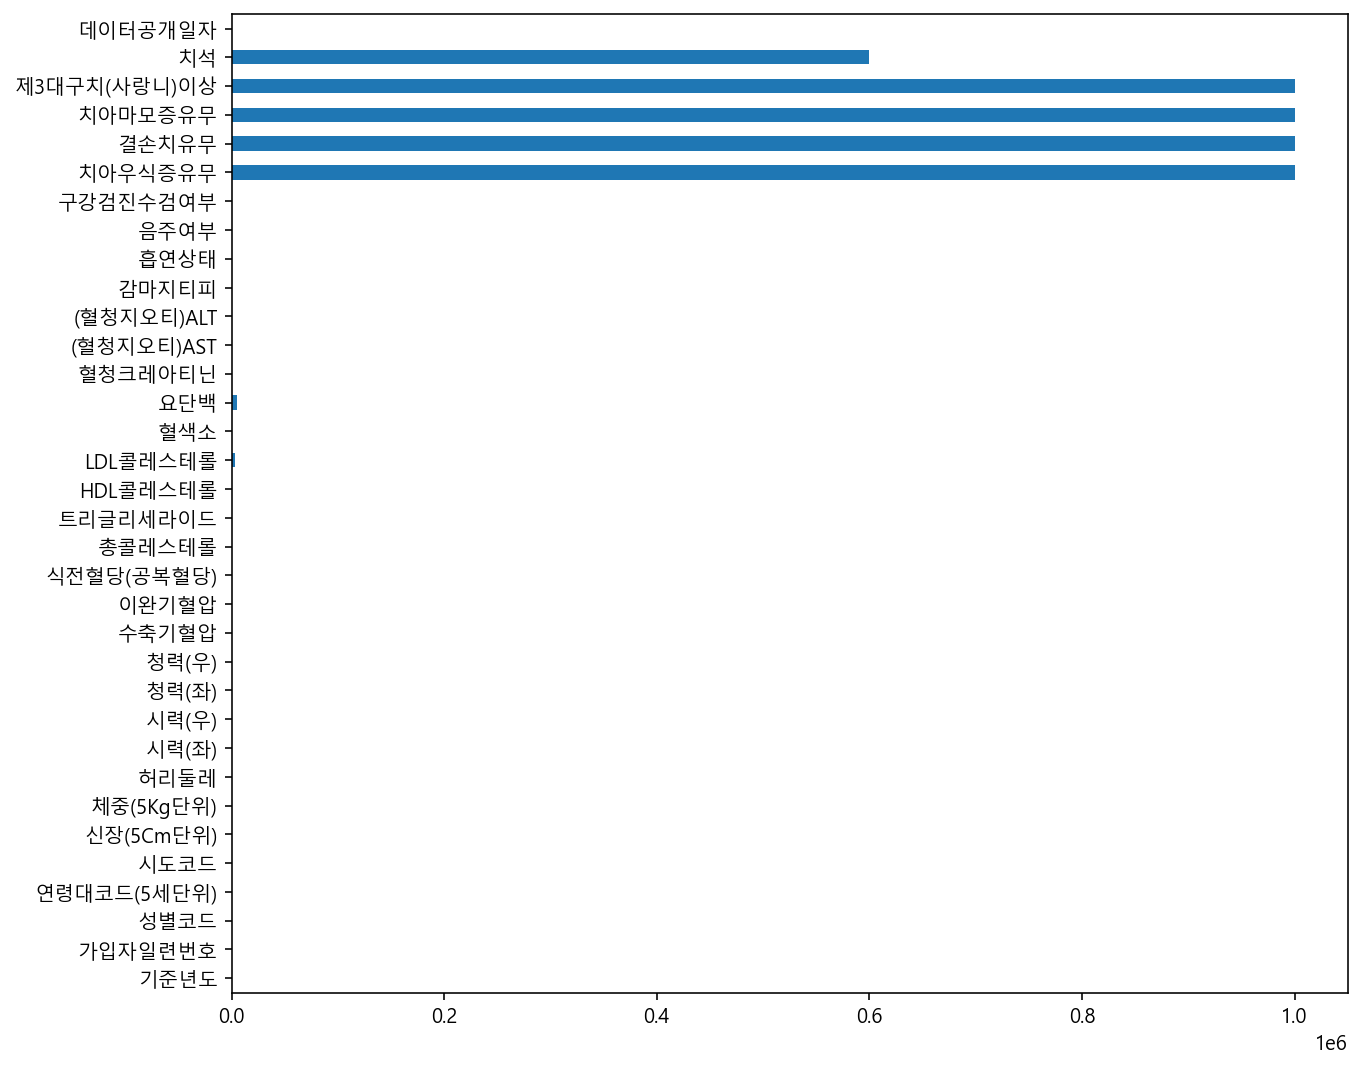

In [10]:
df.isnull().sum().plot.barh(figsize=(10,9))

In [11]:
df[["(혈청지오티)ALT","(혈청지오티)AST"]].describe()

(혈청지오티)ALT     (혈청지오티)AST
count  999958.000000  999959.000000
mean       25.749509      25.994671
std        26.294770      23.587469
min         1.000000       1.000000
25%        15.000000      19.000000
50%        20.000000      23.000000
75%        29.000000      28.000000
max      7210.000000    9999.000000

In [12]:
df["성별코드"].value_counts()

1    530410
2    469590
Name: 성별코드, dtype: int64

In [13]:
df["흡연상태"].value_counts()

1.0    607942
3.0    215702
2.0    176212
Name: 흡연상태, dtype: int64

In [14]:
df.groupby(["성별코드"]).mean()

기준년도        가입자일련번호  연령대코드(5세단위)       시도코드   신장(5Cm단위)  체중(5Kg단위)  \
성별코드                                                                         
1     2017.0  499656.610053    10.308458  34.098773  168.537858  70.120963   
2     2017.0  500388.929624    10.773935  33.238046  155.101397  55.528972   

           허리둘레     시력(좌)     시력(우)     청력(좌)  ...      감마지티피      흡연상태  \
성별코드                                           ...                        
1     85.079026  1.036886  1.035752  1.032173  ...  49.445130  2.062924   
2     76.883707  0.916758  0.912829  1.031174  ...  23.335241  1.093455   

          음주여부  구강검진수검여부  치아우식증유무  결손치유무  치아마모증유무  제3대구치(사랑니)이상        치석  \
성별코드                                                                        
1     0.672553  0.435324      NaN    NaN      NaN           NaN  0.639805   
2     0.303534  0.361215      NaN    NaN      NaN           NaN  0.550845   

         데이터공개일자  
성별코드              
1     20181126.0  
2     20181126.0  

[2 rows x 33 columns]

In [15]:
df.groupby(["성별코드"])["가입자일련번호"].count()

성별코드
1    530410
2    469590
Name: 가입자일련번호, dtype: int64

In [16]:
df.groupby(["성별코드", "음주여부"])["가입자일련번호"].count()

성별코드  음주여부
1     0.0     173612
      1.0     356587
2     0.0     326827
      1.0     142438
Name: 가입자일련번호, dtype: int64

In [17]:
df.groupby(["성별코드", "음주여부"])["감마지티피"].describe()

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    0.0   173604.0  34.739868  37.606197  1.0  18.0  25.0  38.0  999.0
     1.0   356576.0  56.610981  68.851128  1.0  24.0  37.0  63.0  999.0
2    0.0   326813.0  22.612408  25.203579  1.0  13.0  17.0  24.0  999.0
     1.0   142429.0  25.001018  36.725100  1.0  13.0  17.0  25.0  999.0

In [18]:
df.groupby(["성별코드", "음주여부"])["감마지티피"].agg(["count", "mean", "median"])

count       mean  median
성별코드 음주여부                           
1    0.0   173604  34.739868    25.0
     1.0   356576  56.610981    37.0
2    0.0   326813  22.612408    17.0
     1.0   142429  25.001018    17.0

In [19]:
df.pivot_table(index="성별코드", values="가입자일련번호", aggfunc="count")

가입자일련번호
성별코드         
1      530410
2      469590

In [20]:
pd.pivot_table(df, index="음주여부", values="감마지티피", aggfunc=["mean", "median"])

mean median
          감마지티피  감마지티피
음주여부                  
0.0   26.819650   19.0
1.0   47.588675   30.0

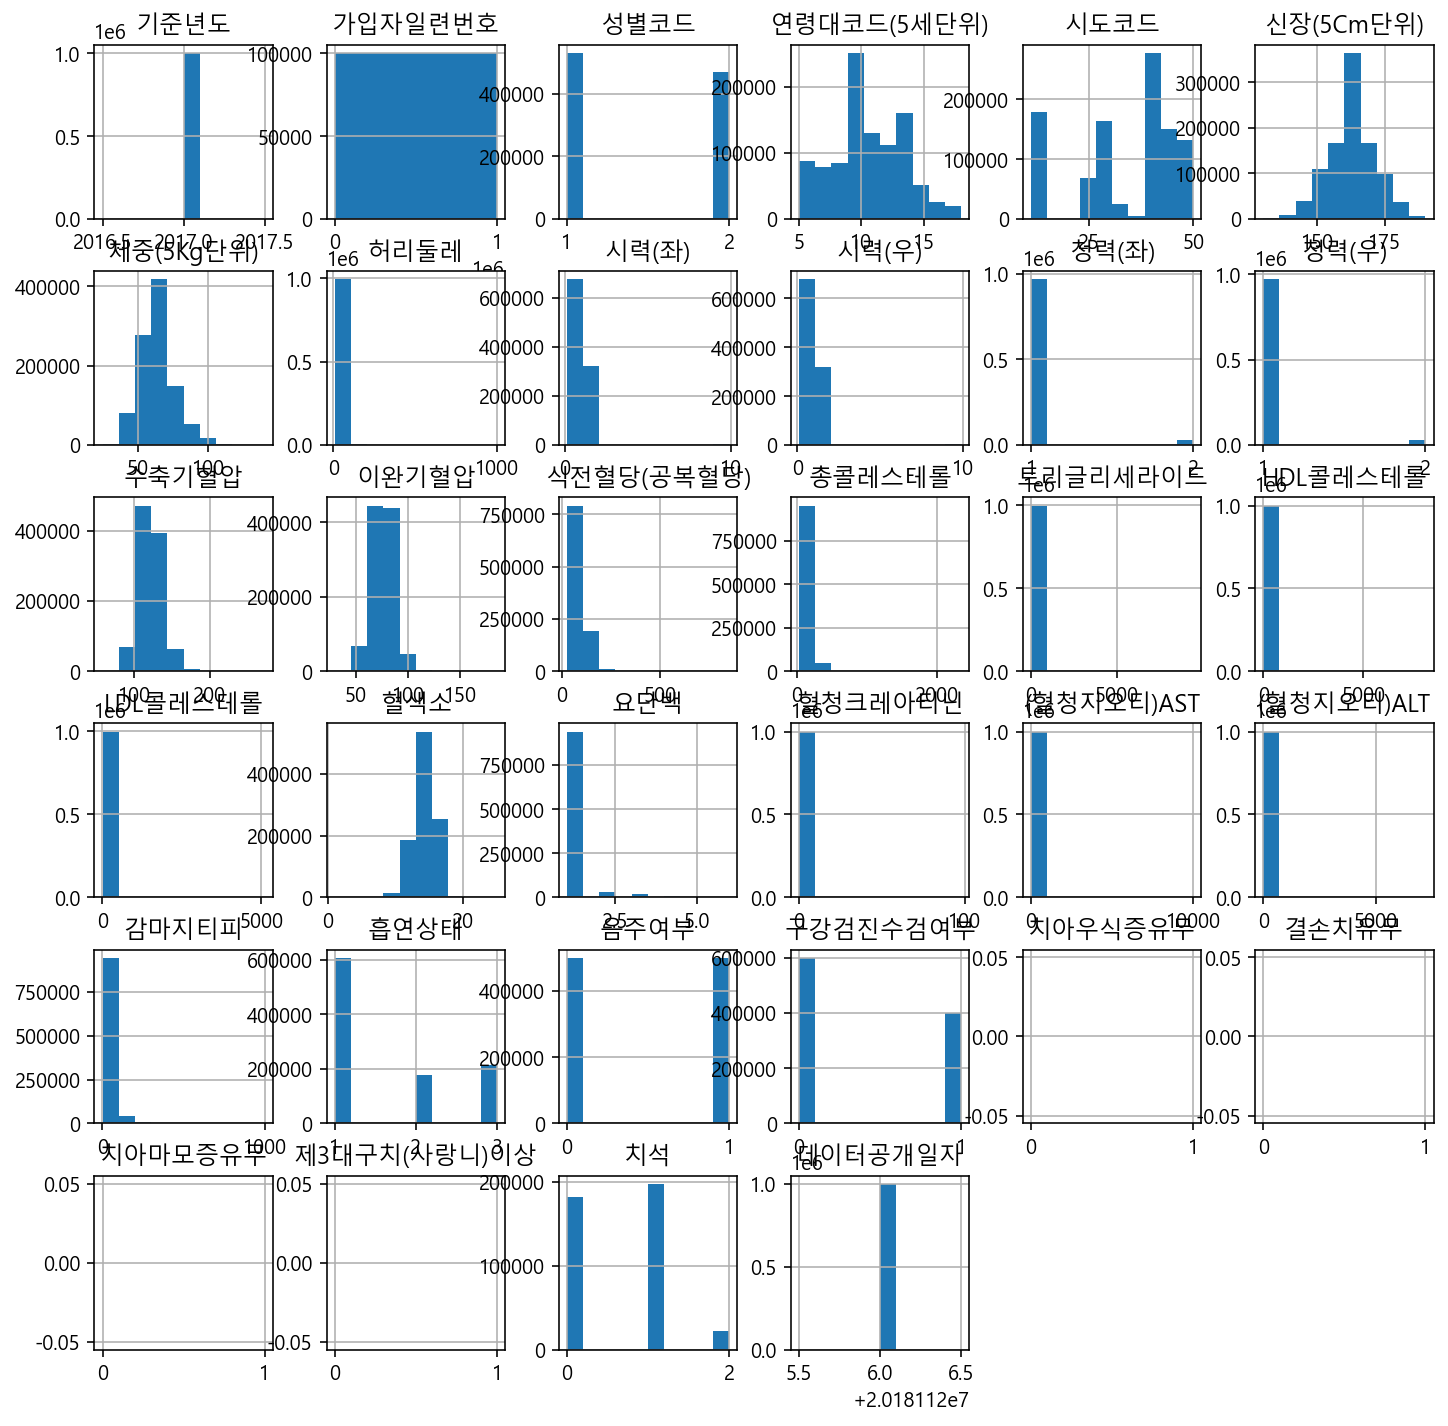

In [21]:
h = df.hist(figsize=(12,12))

array([[<AxesSubplot:title={'center':'기준년도'}>,
        <AxesSubplot:title={'center':'가입자일련번호'}>,
        <AxesSubplot:title={'center':'성별코드'}>],
       [<AxesSubplot:title={'center':'연령대코드(5세단위)'}>,
        <AxesSubplot:title={'center':'시도코드'}>,
        <AxesSubplot:title={'center':'신장(5Cm단위)'}>],
       [<AxesSubplot:title={'center':'체중(5Kg단위)'}>,
        <AxesSubplot:title={'center':'허리둘레'}>,
        <AxesSubplot:title={'center':'시력(좌)'}>],
       [<AxesSubplot:title={'center':'시력(우)'}>,
        <AxesSubplot:title={'center':'청력(좌)'}>,
        <AxesSubplot:title={'center':'청력(우)'}>]], dtype=object)

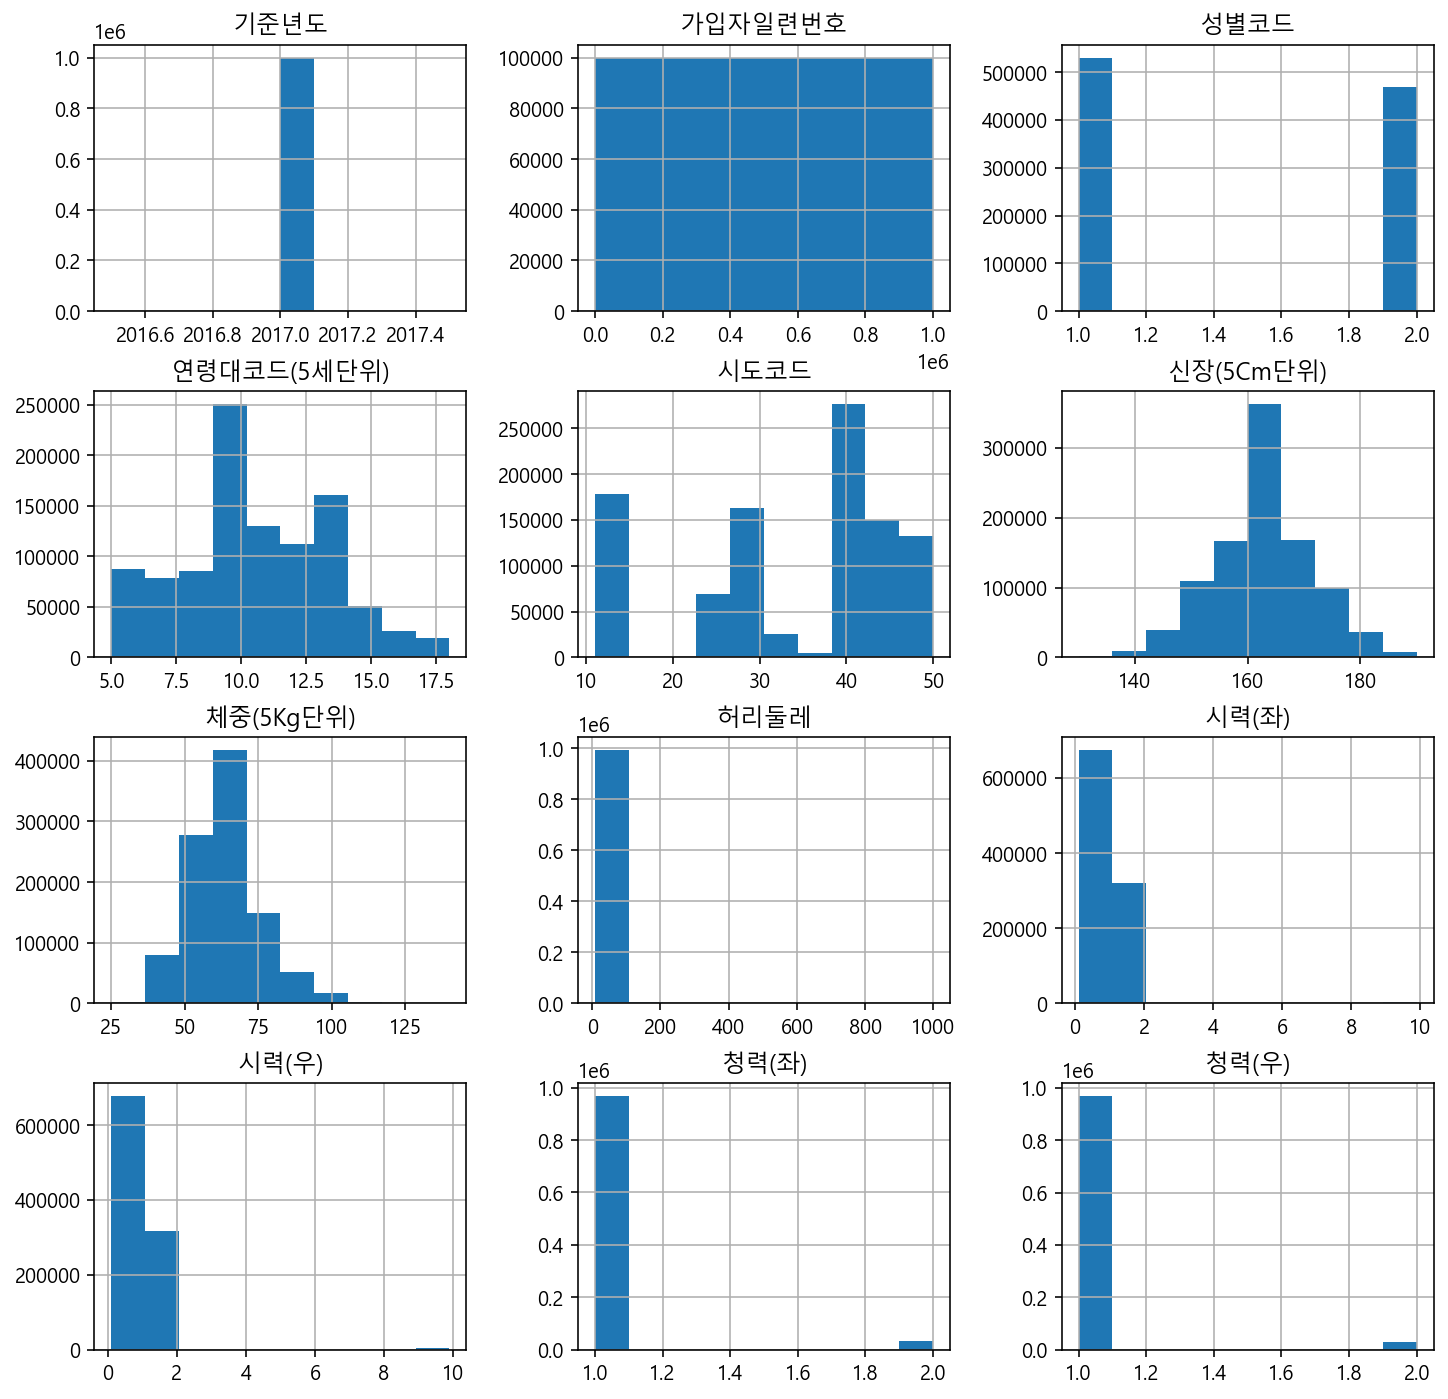

In [22]:
df.iloc[:, :12].hist(figsize=(12,12))

array([[<AxesSubplot:title={'center':'수축기혈압'}>,
        <AxesSubplot:title={'center':'이완기혈압'}>,
        <AxesSubplot:title={'center':'식전혈당(공복혈당)'}>],
       [<AxesSubplot:title={'center':'총콜레스테롤'}>,
        <AxesSubplot:title={'center':'트리글리세라이드'}>,
        <AxesSubplot:title={'center':'HDL콜레스테롤'}>],
       [<AxesSubplot:title={'center':'LDL콜레스테롤'}>,
        <AxesSubplot:title={'center':'혈색소'}>,
        <AxesSubplot:title={'center':'요단백'}>],
       [<AxesSubplot:title={'center':'혈청크레아티닌'}>,
        <AxesSubplot:title={'center':'(혈청지오티)AST'}>,
        <AxesSubplot:title={'center':'(혈청지오티)ALT'}>]], dtype=object)

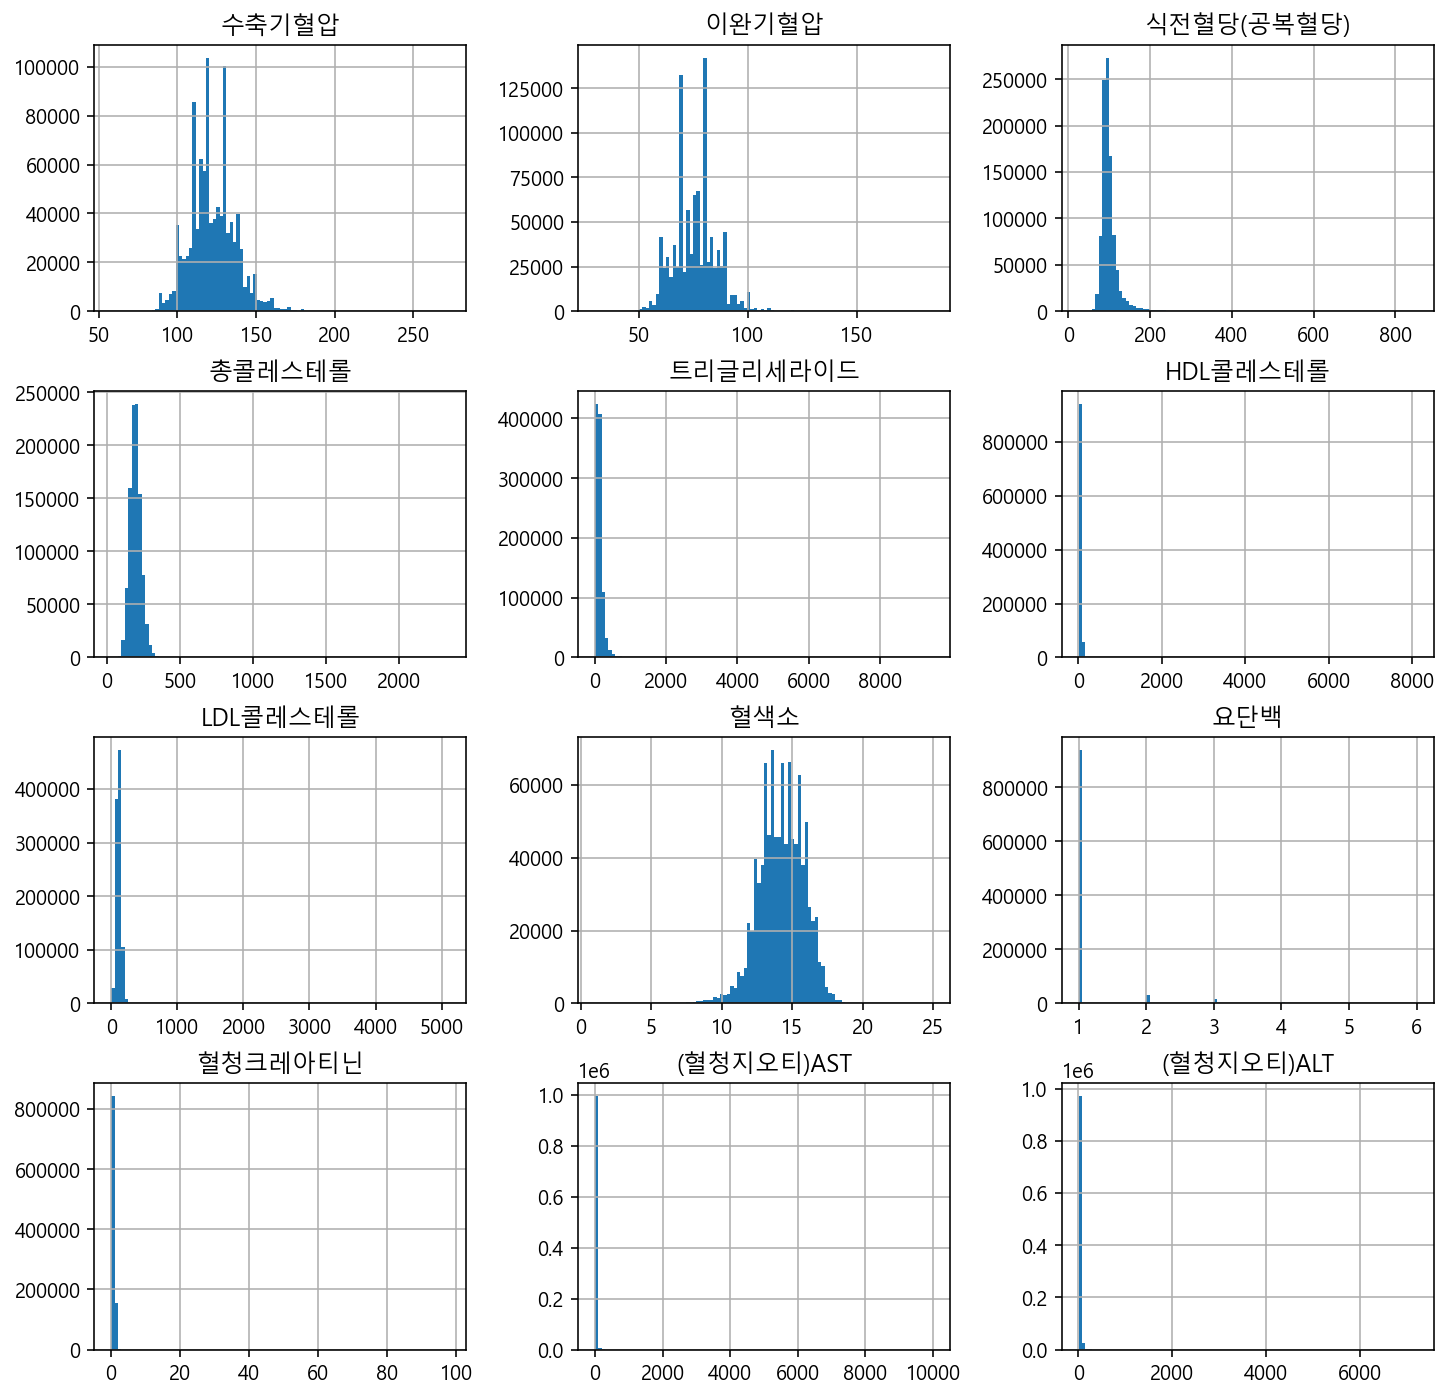

In [23]:
df.iloc[:, 12:24].hist(figsize=(12,12),bins=100)

array([[<AxesSubplot:title={'center':'감마지티피'}>,
        <AxesSubplot:title={'center':'흡연상태'}>,
        <AxesSubplot:title={'center':'음주여부'}>],
       [<AxesSubplot:title={'center':'구강검진수검여부'}>,
        <AxesSubplot:title={'center':'치아우식증유무'}>,
        <AxesSubplot:title={'center':'결손치유무'}>],
       [<AxesSubplot:title={'center':'치아마모증유무'}>,
        <AxesSubplot:title={'center':'제3대구치(사랑니)이상'}>,
        <AxesSubplot:title={'center':'치석'}>],
       [<AxesSubplot:title={'center':'데이터공개일자'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

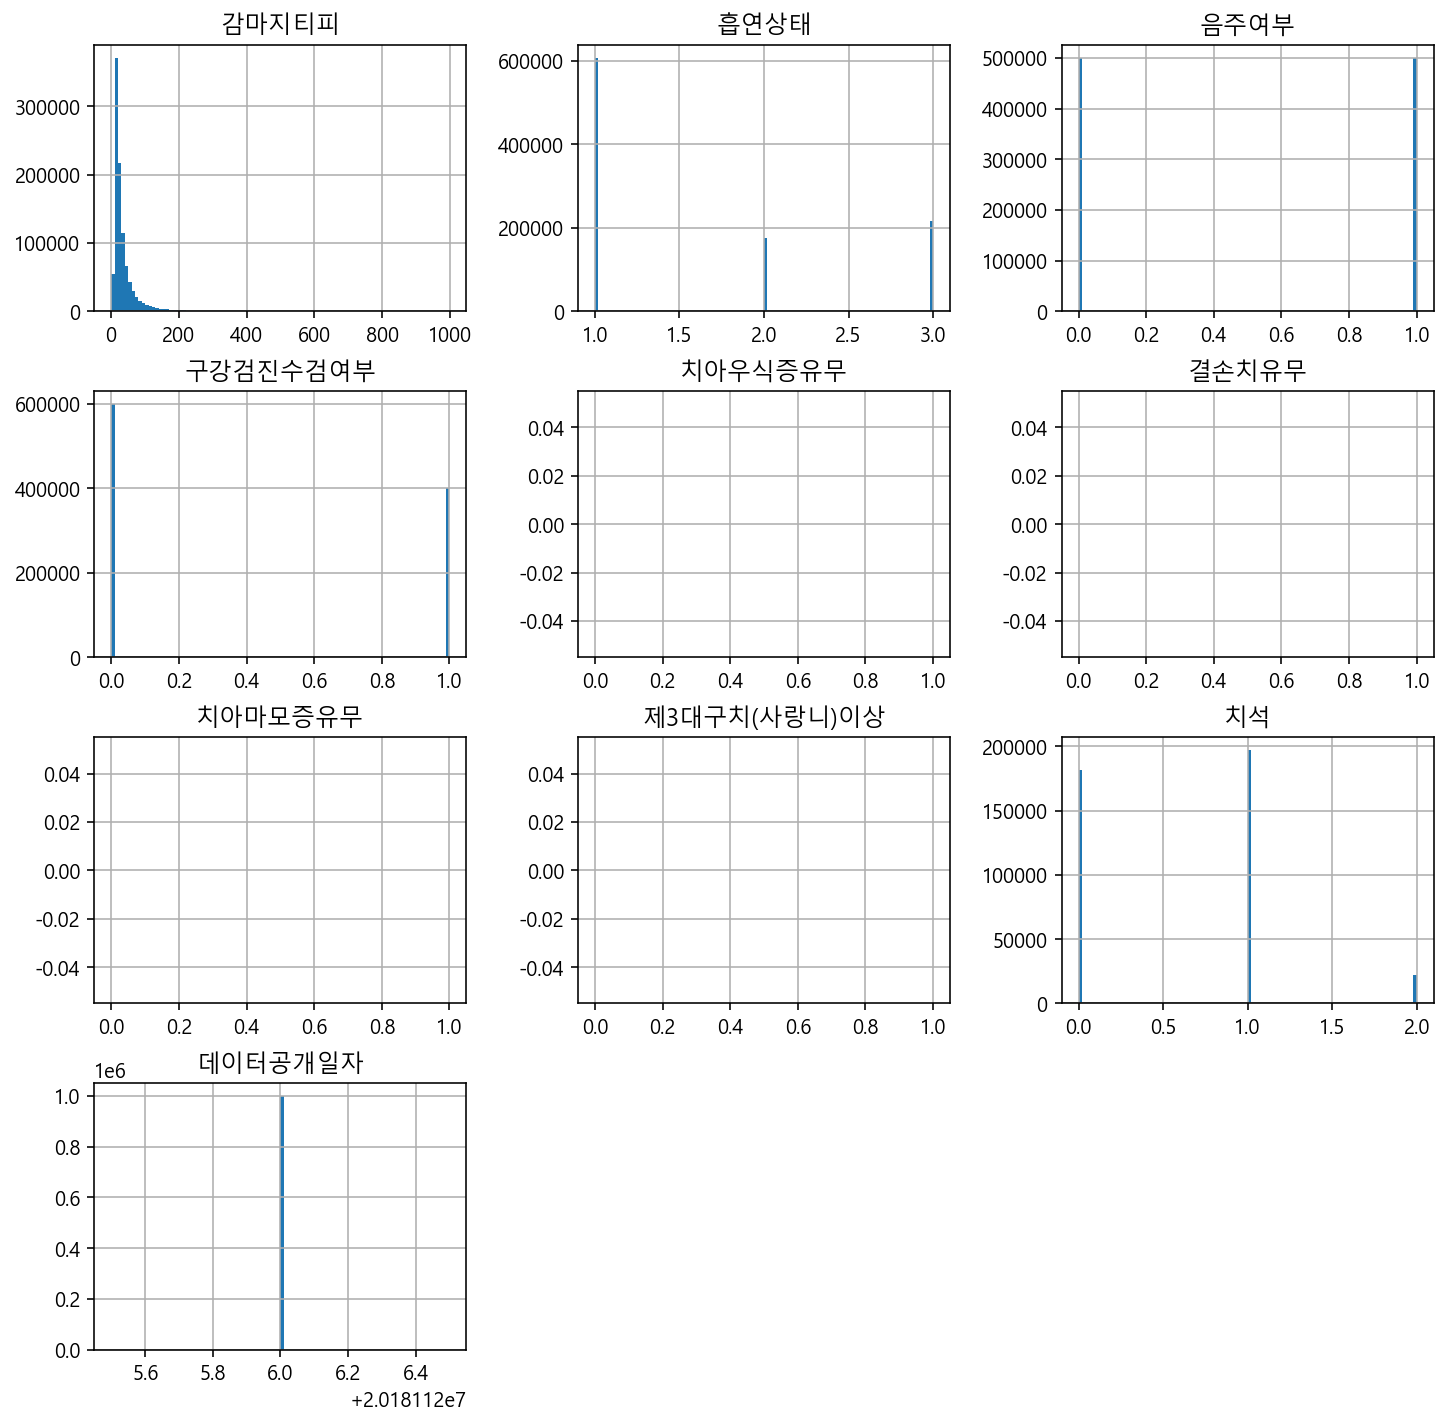

In [24]:
df.iloc[:,24:].hist(figsize=(12,12),bins=100)

In [25]:
df_sample = df.sample(1000, random_state=1)
df_sample.shape

(1000, 34)

<AxesSubplot:>

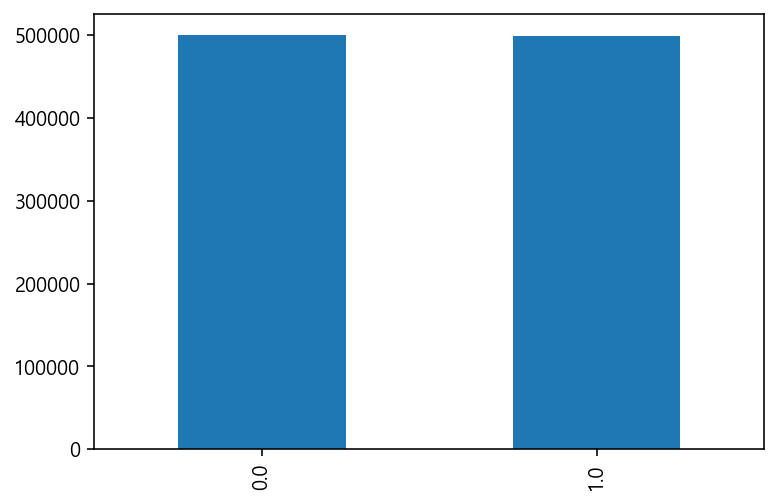

In [26]:
df["음주여부"].value_counts().plot.bar()

<AxesSubplot:xlabel='음주여부', ylabel='count'>

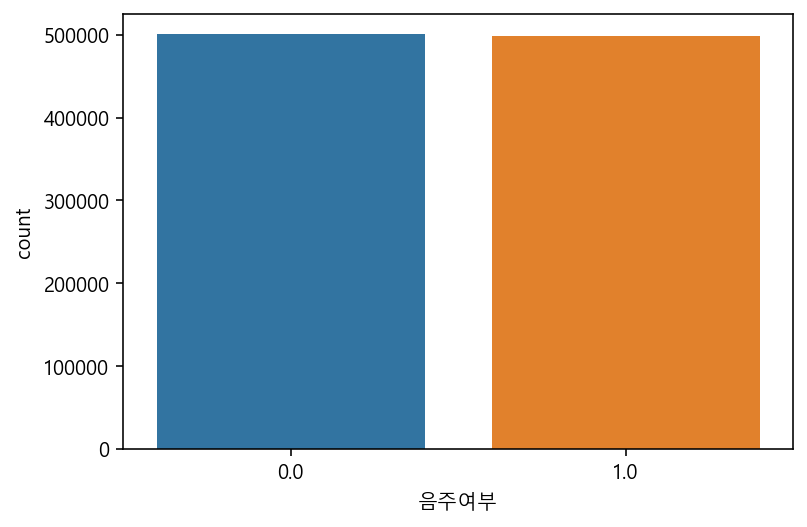

In [27]:
sns.countplot(x='음주여부', data=df)

<AxesSubplot:xlabel='음주여부', ylabel='count'>

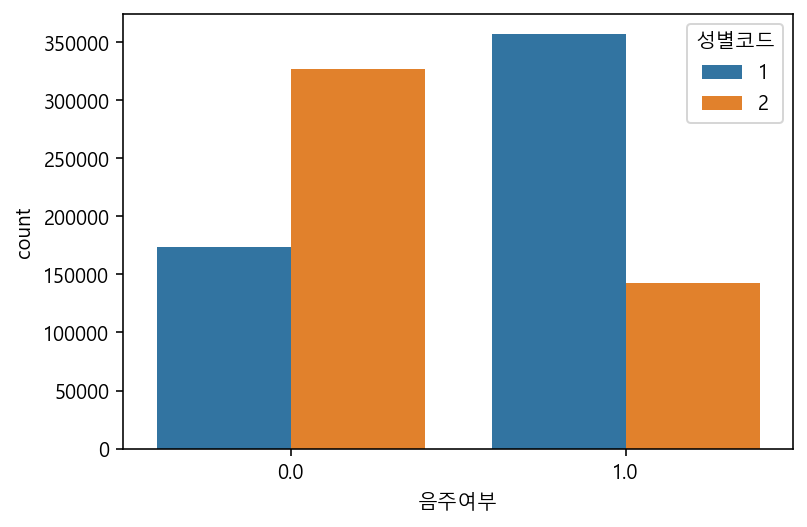

In [28]:
sns.countplot(x='음주여부', data=df, hue="성별코드")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='count'>

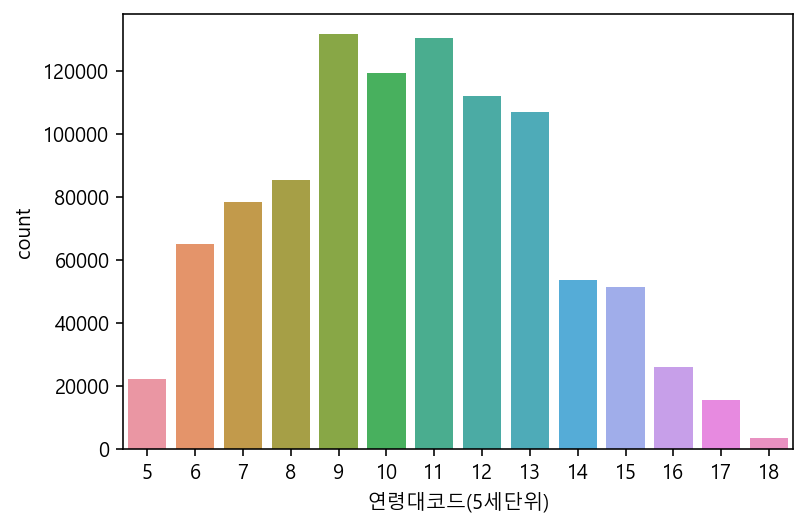

In [29]:
sns.countplot(data=df , x="연령대코드(5세단위)")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='count'>

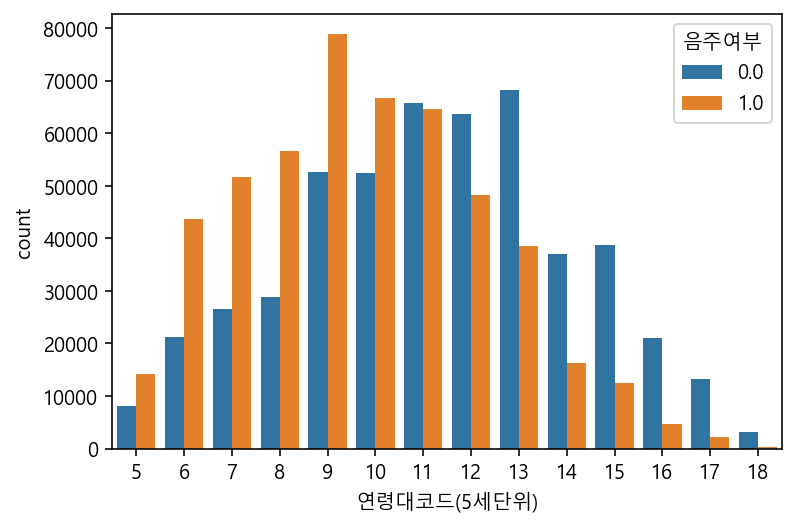

In [30]:
sns.countplot(data=df , x="연령대코드(5세단위)", hue="음주여부")

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='count'>

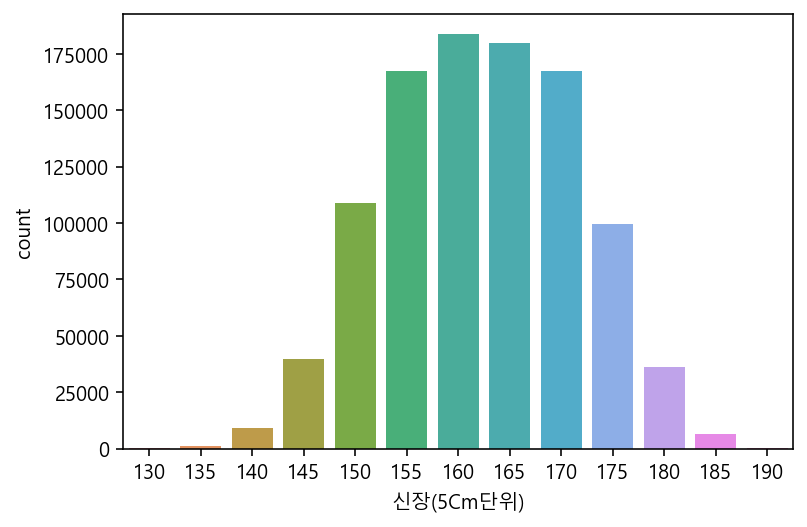

In [31]:

sns.countplot(data=df, x="신장(5Cm단위)")

<AxesSubplot:xlabel='체중(5Kg단위)', ylabel='count'>

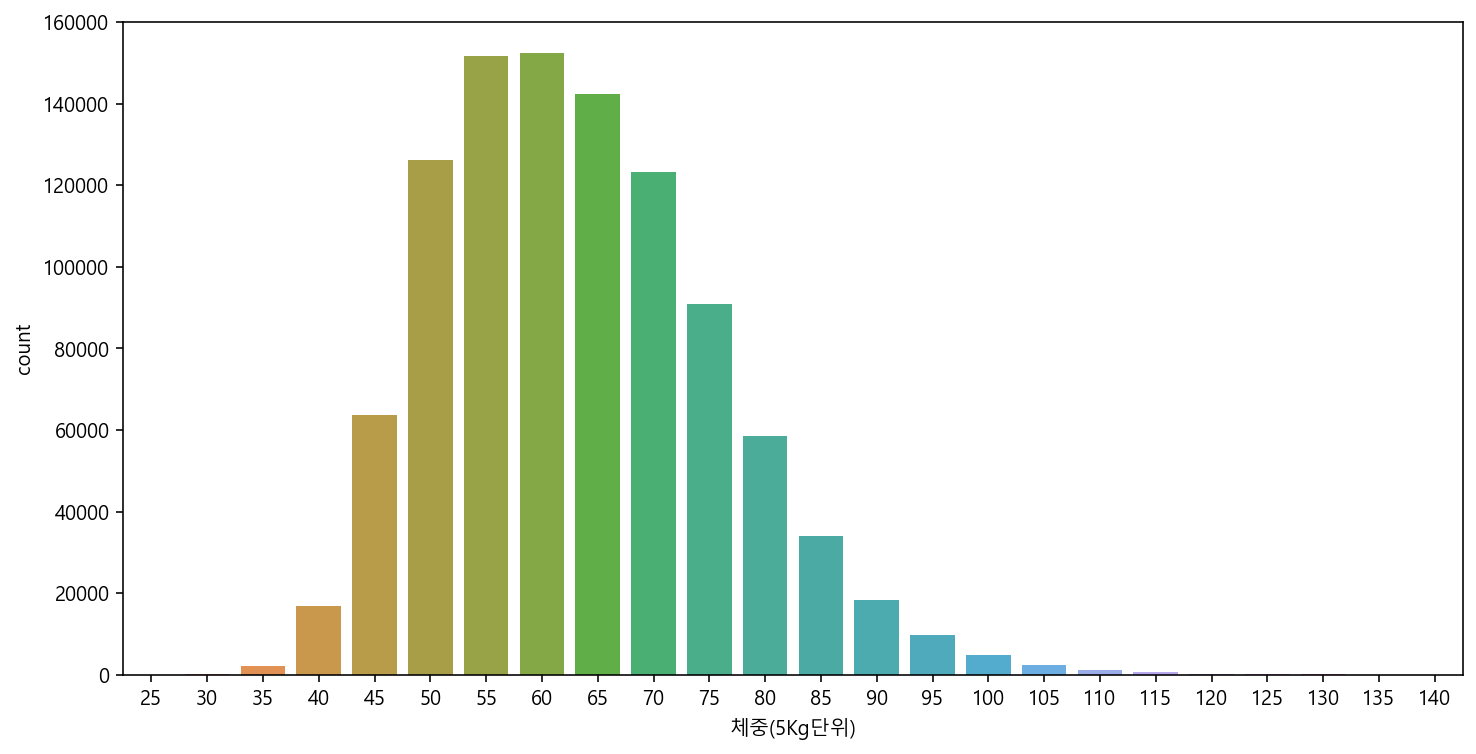

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="체중(5Kg단위)")

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='count'>

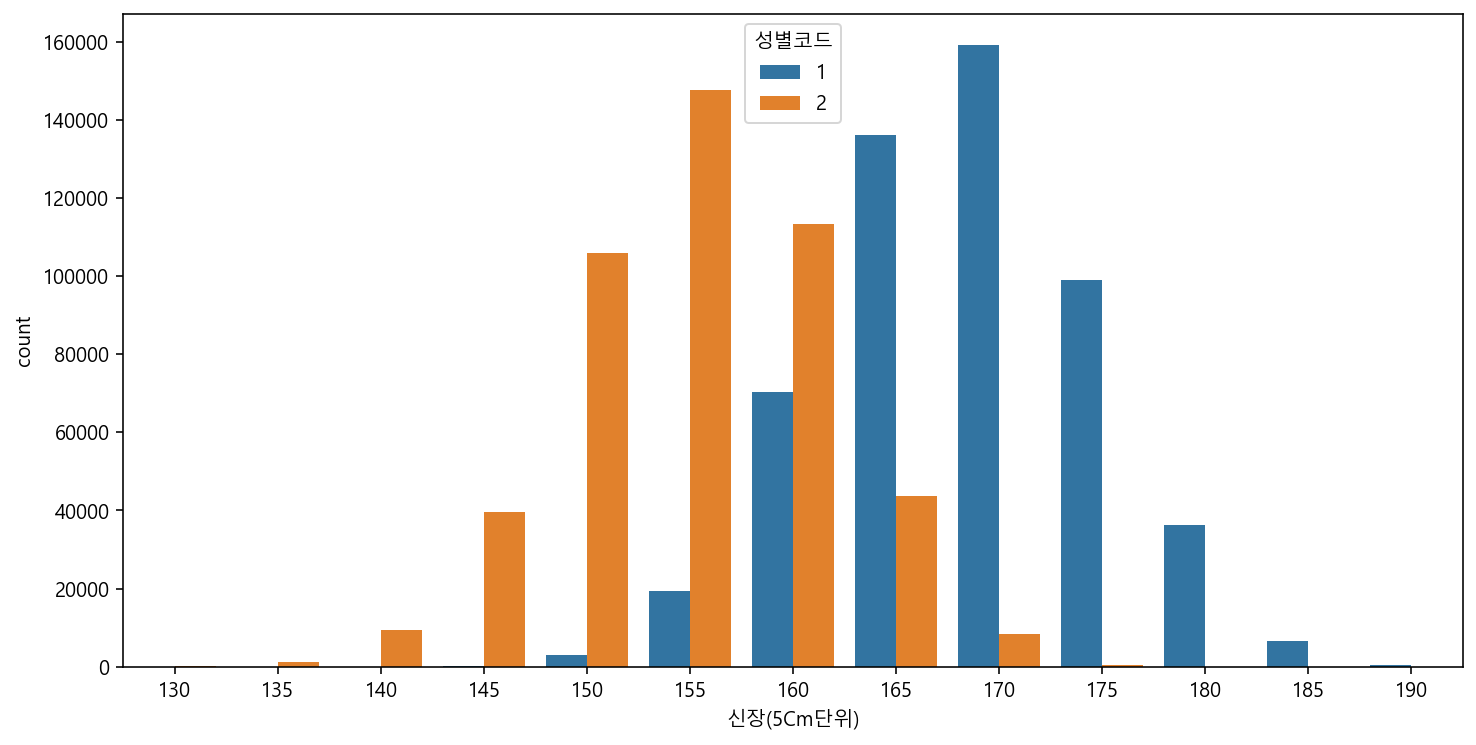

In [33]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="신장(5Cm단위)", hue="성별코드")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg단위)'>

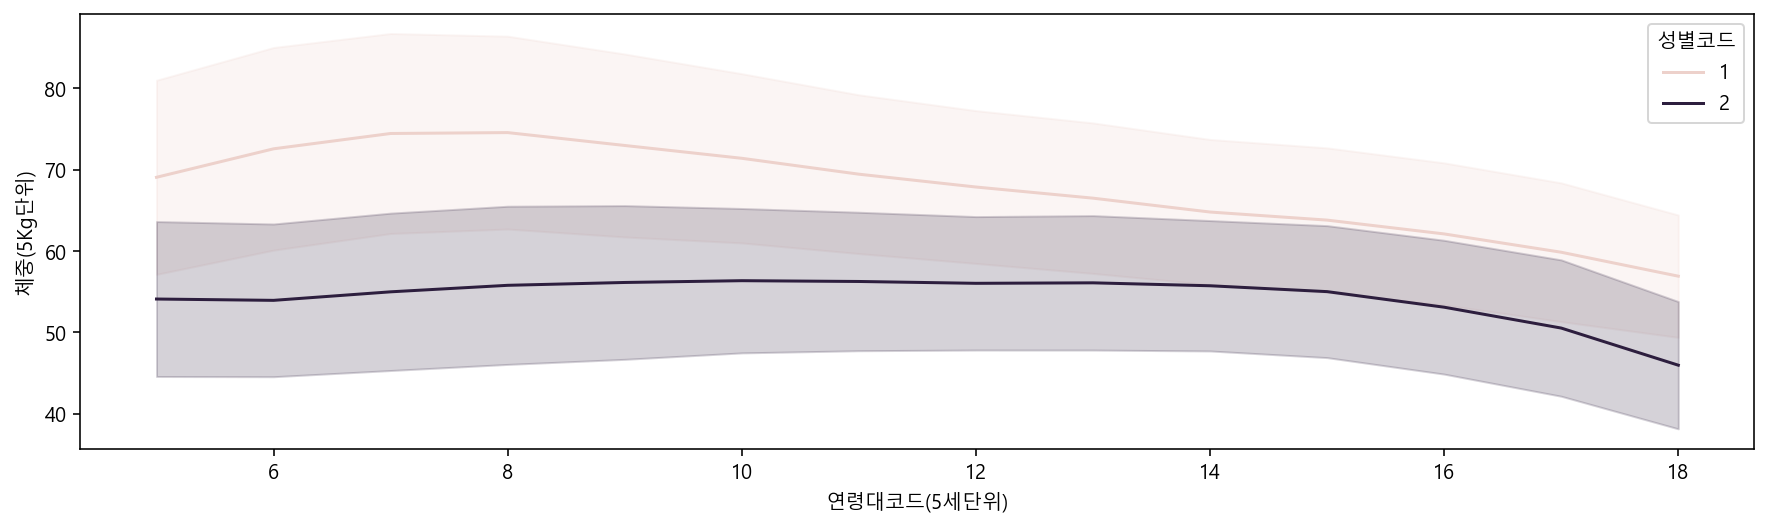

In [34]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="성별코드", ci="sd")

SyntaxError: invalid syntax (<ipython-input-35-40c5c93bca4b>, line 1)